<a href="https://colab.research.google.com/github/migodelacruz/COMP8220/blob/master/practical_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forests

In this practical session you will be using the iris flower dataset to build decision tree and Random Forest classifiers. Also, feature seclection will be performed in order to generate a new model based on the selected features.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('./gdrive/My Drive/COMP8220/')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

# Load the iris dataset
iris = datasets.load_iris()

Print the target names (target_names), the feature names (feature_names), the top five records of the iris flower dataset and the iris labels (0, 1, 2).

In [4]:
print(iris.target_names)

print(iris.feature_names)

print(iris.data[0:5])

print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Create a data frame for the iris flower dataset and use the head() method to display to top n rows of the data frame.

In [5]:
df = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Task 1**: Separate the columns into features and labels and then split the resulting two variables into a training set (70\%) and a test set (30\%).

In [16]:
from sklearn.model_selection import train_test_split

# your code
columns = list(df.columns)
print(columns)
X = df[columns[0:-1]]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

['sepal length', 'sepal width', 'petal length', 'petal width', 'species']


**Task 2**: Create a decision tree model on the training data with default settings, and perform prediction on the testing data.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# your code
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

**Task 3**: Import the scikit-learn metrics module and calculate the accuracy of the classifier.

In [19]:
from sklearn.metrics import accuracy_score

# your code
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the Decision Tree Classifier:", accuracy.round(3))

Accuracy of the Decision Tree Classifier: 0.978


**Task 4**: Make a predication with the decision tree model for a single instance of your choice.

In [44]:
# your code
import random

test_index = random.choice(X_test.index.values)
print(test_index, "\n")

single_X = X_test.loc[[test_index]]
single_y = y_test[test_index]

single_pred = dt_clf.predict(single_X)

print("Prediction is class:", single_pred)
print("Actual label:", single_y)

103 

Prediction is class: [2]
Actual label: 2


**Task 5**: Create a Random Forest classifier with 100 trees in the forest, train the model on the training set and perform predictions on the test set. Also, display the accuracy.

In [45]:
# your code
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy of the Random Forest Classifier:", accuracy.round(3))

Accuracy of the Random Forest Classifier: 0.978


**Task 6**: Make a predication for a single instance of your choice. Compare the results from the decision tree classifier and that from the random forest. 

In [46]:
# Use the same single instance used in the Decision Tree Classifier for RF Classifier
single_pred = rf_clf.predict(single_X)

print("Prediction is class:", single_pred)
print("Actual label:", single_y)

Prediction is class: [2]
Actual label: 2


Explore how you can display the feature importance scores of the classifier (using the feature_importances_ attribute).

In [50]:
dt_feature_importance = pd.Series(dt_clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print("Decision Tree CLF Feature Importance:", dt_feature_importance)

rf_feature_importance = pd.Series(rf_clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print("\nRandom Forest CLF Feature Importance:", rf_feature_importance)

Decision Tree CLF Feature Importance: petal length (cm)    0.566660
petal width (cm)     0.397538
sepal width (cm)     0.035802
sepal length (cm)    0.000000
dtype: float64

Random Forest CLF Feature Importance: petal width (cm)     0.489543
petal length (cm)    0.425287
sepal length (cm)    0.065285
sepal width (cm)     0.019884
dtype: float64


Create a bar plot using the seaborn library and visualise the feature importance score.

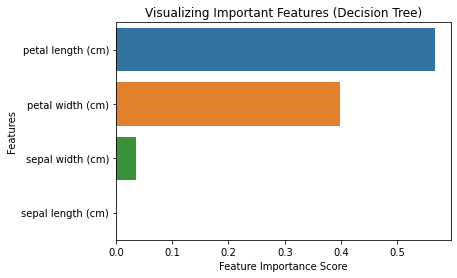

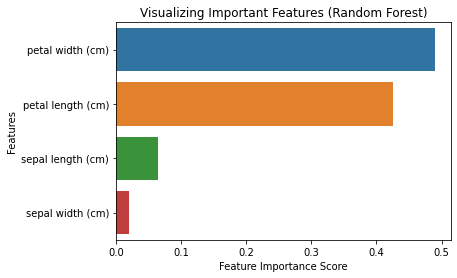

In [53]:
%matplotlib inline

sns.barplot(x=dt_feature_importance, y=dt_feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Decision Tree)")
plt.show()

sns.barplot(x=rf_feature_importance, y=rf_feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

**Task 7**: Remove the "sepal width" feature because this feature has very low importance. Select the 3 remaining features and split the dataset into features and labels. Produce again training set (70%) and a test set (30%). 

In [54]:
# your code
X_new = df[['petal width', 'petal length', 'sepal length']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 24)

**Task 8**: Generate a model using a decision tree classifier as before, train the model using the new training set, perform predications on the new test set and display the accuracy of the new classifier. Compare with the case with orginal features.

In [56]:
# your code
dt_new_clf = DecisionTreeClassifier()
dt_new_clf.fit(X_train, y_train)

y_new_pred = dt_new_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_new_pred)

print("Accuracy of the Decision Tree Classifier (without Sepal Width):", accuracy.round(3))

Accuracy of the Decision Tree Classifier (without Sepal Width): 0.978


**Task 9:** Generate a model using a Random Forest classifier as before, train the model using the new training set, perform predications on the new test set and display the accuracy of the new classifier. Compare with the case with orginal features.

In [57]:
# your code
rf_new_clf = DecisionTreeClassifier()
rf_new_clf.fit(X_train, y_train)

y_new_pred = rf_new_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_new_pred)

print("Accuracy of the Random Forest Classifier (without Sepal Width):", accuracy.round(3))

Accuracy of the Random Forest Classifier (without Sepal Width): 0.978
